# 1D Plasticity Theory

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Loading only (NO History)

In [2]:
E_EL = pow(10,7)
E_P = pow(10,6)
eng_strain = np.linspace(0,3.0,num=400)

k_init = pow(10,7)
eng_strain_init = k_init/E_EL

In [3]:
eng_stress = np.empty(eng_strain.size);
for (i,element) in enumerate(eng_strain):
    if eng_strain_init > element:
        eng_stress[i] = E_EL * element
    else:
        eng_stress[i]= k_init + E_P *(element-eng_strain_init)

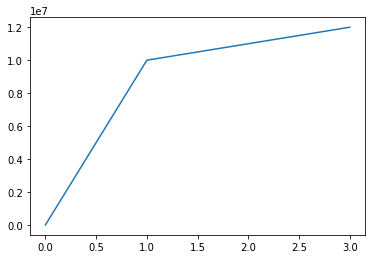

In [4]:
plt.plot(eng_strain,eng_stress)

## Elasto-Plastic Increments

In [5]:
# SUBSEQUENT LOADING, First:+, Second:-
eng_strain = np.append(eng_strain,eng_strain[::-1])

eng_stress = np.empty(eng_strain.size);

def F(stress,strain_p,strain_p_eff):
    return abs(stress - H()*strain_p) - (k_init + E_P*strain_p_eff)
    
def H():
    return 1e6
def E_ELPL(E_EL,E_P,H):
    return E_EL*( H() + E_P)/(E_EL+(H()+E_P))
strain_increments = np.empty((eng_strain.size -1))

for i in range(eng_strain.size -1):
    strain_increments[i]=eng_strain[i+1]-eng_strain[i]

p_strain = 0;
p_strain_eff = 0;
stress = 0;
for (i,strain_inc) in enumerate(strain_increments):  
    temp_stress = stress + E_EL*(strain_inc)
    if(F(temp_stress,p_strain,p_strain_eff)<=0):
        stress = temp_stress;
    else:
        stress += E_P*(strain_inc)
        p_strain += strain_inc
        p_strain_eff += abs(strain_inc)
    eng_stress[i+1] =stress;

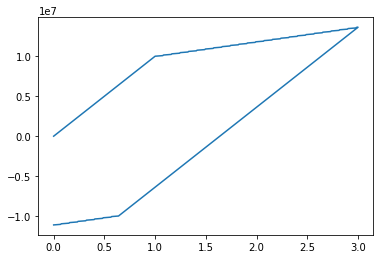

In [6]:
plt.plot(eng_strain,eng_stress)
